In [140]:
import sys 
import math
import matplotlib as mpl
from matplotlib import pyplot as plt 
import matplotlib.pylab as plt
import matplotlib.path as mpath
from matplotlib.pyplot import figure
import numpy as np
import traceback
import imageio
import os, glob

In [141]:
#constants
Ns= 0.01 #1/s
xo= 0 #m
zo= 0 #m 
#Nt= 500 
Nt = 200
dt= 100 #s

#loop this to see multiple particle launches 
mo= 2*np.pi/1000
ko= 2*np.pi/1000

#d
dU=10 #m/s
b = 500 #in m, 
L = 3000  #in m 

#dispersion relation/ frequency
wo= Ns*ko / np.sqrt(mo**2 + ko**2)

#initialize zero arrays
m_arr=np.zeros((Nt,))
N_arr=np.zeros((Nt,))
xp_arr=np.zeros((Nt,))
zp_arr=np.zeros((Nt,))

m_arr[0]=mo
N_arr[0]=Ns


In [142]:

for it in range(Nt -1 ):
    
    #group velocity 
    Cgx= N_arr[it]*m_arr[it]**2 / (m_arr[it]**2 + ko**2)**1.5
    Cgz= N_arr[it]*ko*m_arr[it] /(m_arr[it]**2 + ko**2)**1.5
    
    #particle position
    xp_arr[it+1]= xp_arr[it] + dt*Cgx
    zp_arr[it+1]= zp_arr[it] + dt*Cgz
    
    #change vertical wave # with height 
    
    #a) N const. w/ height 
    #N_arr[it+1] = Ns 
    
    #b) N monotonically decrease w/ height 
    #N_arr[it+1] =  Ns + -Ns * zp_arr[it+1]/10000
        
    #c) N monotonically increase w/ height
    #N_arr[it+1] = Ns + Ns/10000 *zp_arr[it+1]
 
        
    #d) N having a single peak above at some height above the ground 
    #For this one more time steps 
    N_arr[it+1] = Ns + Ns/(1+ (zp_arr[it+1]-L)**2 /b**2)
    
    
    m_arr[it+1]= ko*np.sqrt(N_arr[it+1]**2/wo**2-1)    
    

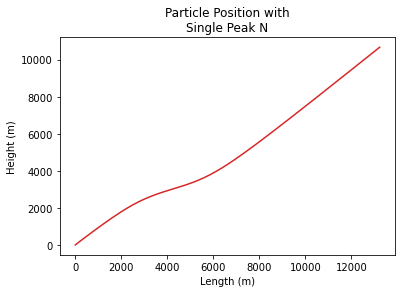

In [143]:
# Create Plots 
plt.plot(xp_arr, zp_arr, color='tab:red')
#plt.title('Particle Position with Constant N\nwith Height')
#plt.title('Particle Position with Monotonically\nIncreasing N with Height')
#plt.title('Particle Position with Monotonically\nDecreasing N with Height')
plt.title('Particle Position with\nSingle Peak N')
plt.xlabel('Length (m)')
plt.ylabel('Height (m)')
plt.show()
